In [199]:
#Initials - Pc and dp in natural units 

import math 
k = 2
GA = 0.5
pi = math.pi

def R0(Pc,dp):
   dc = (Pc/k)**(1/GA)
   P = Pc - dp 
   return  ((3/(2*pi*(3*Pc + dc)))*((math.log(dc + Pc)) - (math.log((P/k)**(1/GA) + P))))**(0.5)

def M0(Pc,dp):
    dc = (Pc/k)**(1/GA)
    P = Pc - dp 
    return (math.log((dc + Pc)) -(math.log((P/k)**(1/GA) + P)))*(2*dc/(3*Pc + dc))*R0(Pc,dp)


c:\Users\Abhimkul\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(6.666090212919478e-09, 0.03992830333920174, 5.165268628057983e+17)

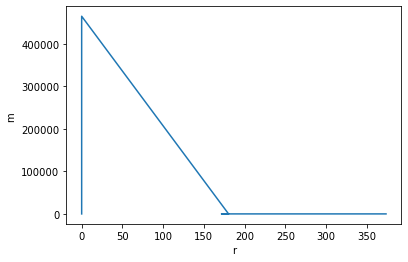

In [243]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

k = 2
GA = 0.5
pi = math.pi

#Conversion for scaling
MeV = 1 
GeV = 1000*MeV
fm  = 1
c   = 1
metres =(10**15)*fm
second = 3*(10**8)*metres
kg = (second**2)/(1.6*(10**-13))*((metres)**2)
G = 6.67*10**(-11)*((metres)**3)/(kg*(second)**2)

#Defining the values in terms
Rs = ((2*G*(2*10**30*kg))/((c**2)*(metres/second)**2))**0.5
K1 =  (4*pi*(Rs**3))/(2*((10**30)*kg)*(c**2)*(metres/second))*(GeV/(fm)**3)


def f(x,P):
   m,r = x
   d = (P/k)**(1/GA)
   dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
   drdp = (2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
   return [dmdp , drdp]


#Initials
Ro =  R0(Pc = 0.01,  dp = (10**(-6)))
Mo =  M0(Pc = 0.01 ,  dp = (10**(-6)))

x0 = [Mo,Ro]

#P0 = Pc- dp
P0 = 0.01 - (10**(-6))


P = np.linspace(P0,0.1,1000)

solve = odeint(f,x0, P)

m =solve[:,0]
r = solve[:,1]

plot.plot(m,r)
plot.xlabel("r")
plot.ylabel("m ")
#plot.ylim(0,0.25*10**-6)

Mo, Ro , Rs